### ark

1.  bullet
1.  bul

In [29]:
%matplotlib inline

In [3]:
dict = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

import pandas as pd
brics = pd.DataFrame(dict)
#print(brics)
brics.tail(3)

,country,capital,area,population
2,India,New Dehli,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


Colon in Pandas excludes upper bound (only if used by int index?)
* .loc - access a group of rows and columns by label(s) or a boolean array
* .iloc - access a group of rows and columns by int. Positions

In [ ]:
print(cars.loc[['AUS', 'EG'], ['drives_right', 'cars_per_cap']])
#Prints rows in first argument and columns in second argument
print(cars.loc[
    ['AUS', 'EG'],                     ###   rows selection
    ['drives_right', 'cars_per_cap']   ###  columns selection (optional)
])

In [1]:
import pandas as pd
anime_df = pd.read_csv('anime.csv')
#print(anime)
#print(initials)
initials = anime_df.apply(lambda my_current_row: my_current_row['name'][:1], axis=1)
anime_df["Initials"] = initials
#type(initials)
anime_df

,anime_id,name,genre,type,episodes,rating,members,Initials
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,K
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,F
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,G
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,S
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,G
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,H
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,H
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,G
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,G
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,G


In [29]:
###  trying different types of objects

#type("blah")
#type('blah')
#type([1,2,3])
#type([])
type(anime)

pandas.core.frame.DataFrame

In [3]:
import pandas as pd
anime_df = pd.read_csv('anime.csv')
#print(anime)
#print(initials)
initials = anime_df.apply(lambda my_current_row: my_current_row['name'][:1], axis=1)
anime_df["Initials"] = initials
#type(initials)
#anime_df
distinct = initials.unique()
#len(distinct)
print(distinct.size)

10


In [5]:
anime_df.groupby(['Initials']).count()

,anime_id,name,genre,type,episodes,rating,members
Initials,,,,,,,
C,4,4,4,4,4,4,4
F,1,1,1,1,1,1,1
G,7,7,7,7,7,7,7
H,4,4,4,4,4,4,4
K,2,2,2,2,2,2,2
M,5,5,5,5,5,5,5
O,2,2,2,2,2,2,2
R,1,1,1,1,1,1,1
S,4,4,4,4,4,4,4


In [9]:
initial_count = anime_df.apply(lambda my_current_row: 1, axis=1)
anime_df["Initial Count"] = initial_count
count_anime_df = anime_df[['Initials', 'Initial Count']].groupby(['Initials']).sum()
#anime_df.groupby(['Initials']).sum()
#anime_df.columns
sort_anime_df = count_anime_df.sort_values(by = ['Initial Count'], ascending=False)
#sort_anime_df.head(3)   ###   top n results
sort_anime_df.rank(axis=0, ascending=False)

,Initial Count
Initials,
G,1.0
M,2.0
C,4.0
H,4.0
S,4.0
K,6.5
O,6.5
F,9.0
R,9.0


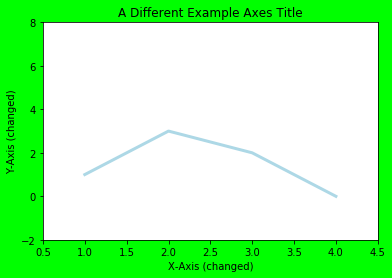

In [6]:
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(facecolor = (0, 1, 0, 1))
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.plot([1, 2, 3, 4], [1.0, 3.0, 2.0, 0.0], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')
plt.show()
#fig = plt.figure(facecolor = (1, 0, 0, 1))

In [ ]:
%matplotlib --list